In [30]:
import tweepy 
import numpy as np 
import csv
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect('tweets.db')
c = conn.cursor()

data = pd.read_sql('select * from crypto',conn)
#data.to_csv("text.csv")
data.head()

,id,user_description,user_location,coordinates,text,geo,user_name,user_created,user_followers,id_str,created,retweet_count,user_bg_color,polarity,subjectivity
0,1,Fiat counterfeiter,None,None,@MrBrianPacker @Smaulgld You should hedge that...,None,js_farinet,2013-02-27 13:53:37.000000,230,1170514264253194240,2019-09-08 01:48:42.000000,0,C0DEED,0.000000,0.000000
1,2,crypto lover,None,None,RT @Rhythmtrader: The Bitcoin PR team that Sat...,None,coffeenbagels,2019-04-20 11:17:37.000000,36,1170514265691713536,2019-09-08 01:48:42.000000,0,F5F8FA,-0.016667,0.366667
2,3,now with 6% more nutmeg! dc sports fan cis/he/him,"Massachusetts, USA",None,@creeptwin @Vaiv71738794 @Velouri72718464 @The...,None,BobooTobian,2015-07-04 00:04:13.000000,641,1170514265763135490,2019-09-08 01:48:42.000000,0,C0DEED,0.250000,0.300000
3,4,Co-founder and CTO at @ComputableLabs. Prev: C...,None,None,I'm personally a bit of a maximalist at heart....,None,rbhar90,2015-06-12 05:21:44.000000,7867,1170514286453510144,2019-09-08 01:48:47.000000,0,C0DEED,0.250000,0.525000
4,5,Monster's don't concern themselves with lament...,A place,None,RT @WallStPlayboys: If you have no technical s...,None,MonsieurFesses,2016-01-01 03:00:42.000000,90,1170514316296183810,2019-09-08 01:48:54.000000,0,000000,0.000000,0.100000


In [31]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [32]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['text'] ])

# We display the updated dataframe with the new column:
data.head()
#data.to_csv("rocket_ship.csv")

,id,user_description,user_location,coordinates,text,geo,user_name,user_created,user_followers,id_str,created,retweet_count,user_bg_color,polarity,subjectivity,SA
0,1,Fiat counterfeiter,None,None,@MrBrianPacker @Smaulgld You should hedge that...,None,js_farinet,2013-02-27 13:53:37.000000,230,1170514264253194240,2019-09-08 01:48:42.000000,0,C0DEED,0.000000,0.000000,0
1,2,crypto lover,None,None,RT @Rhythmtrader: The Bitcoin PR team that Sat...,None,coffeenbagels,2019-04-20 11:17:37.000000,36,1170514265691713536,2019-09-08 01:48:42.000000,0,F5F8FA,-0.016667,0.366667,-1
2,3,now with 6% more nutmeg! dc sports fan cis/he/him,"Massachusetts, USA",None,@creeptwin @Vaiv71738794 @Velouri72718464 @The...,None,BobooTobian,2015-07-04 00:04:13.000000,641,1170514265763135490,2019-09-08 01:48:42.000000,0,C0DEED,0.250000,0.300000,1
3,4,Co-founder and CTO at @ComputableLabs. Prev: C...,None,None,I'm personally a bit of a maximalist at heart....,None,rbhar90,2015-06-12 05:21:44.000000,7867,1170514286453510144,2019-09-08 01:48:47.000000,0,C0DEED,0.250000,0.525000,1
4,5,Monster's don't concern themselves with lament...,A place,None,RT @WallStPlayboys: If you have no technical s...,None,MonsieurFesses,2016-01-01 03:00:42.000000,90,1170514316296183810,2019-09-08 01:48:54.000000,0,000000,0.000000,0.100000,0


In [33]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] < 0]

In [34]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['text'])))

Percentage of positive tweets: 32.6797385620915%
Percentage of neutral tweets: 57.51633986928105%
Percentage de negative tweets: 9.803921568627452%


In [35]:
sen_pos = format(len(pos_tweets)*100/len(data['text']))
sen_neu = format(len(neu_tweets)*100/len(data['text']))
sen_neg = format(len(neg_tweets)*100/len(data['text']))

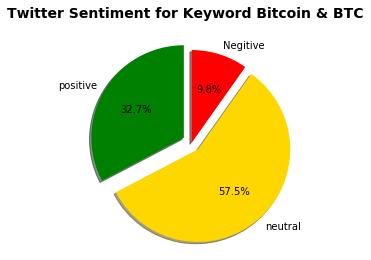

In [36]:
fig = plt.figure()
fig.suptitle('Twitter Sentiment for Keyword Bitcoin & BTC', fontsize=14, fontweight='bold')

labels = "positive","neutral","Negitive"
sizes = [sen_pos,sen_neu,sen_neg]
colors = ['green', 'gold', 'red']
explode = (0.1,0.1,0)  # "explode" Slices for looks

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()